Task 1 - User Overview analysis 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
data = pd.read_excel('Week2_challenge_data_source.xlsx', sheet_name='Sheet1')
descriptions = pd.read_excel('Field Descriptions.xlsx', sheet_name='Sheet1')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
data.shape

(150001, 55)

In [8]:
data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float


**For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance:** 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [28]:
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [30]:
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [37]:
apple_handsets = data[data["Handset Manufacturer"] == "Apple"]
apple_handsets["Handset Type"].value_counts().head(5)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [40]:
apple_handsets = data[data["Handset Manufacturer"] == "Samsung"]
apple_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [39]:
apple_handsets = data[data["Handset Manufacturer"] == "Huawei"]
apple_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

The marketing team should focus on users with handsets from these top three manufacturers: **Apple, Samsung and Huawei.**



**Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.** 
- Aggregate per user the following information in the column  - (Jupyter notebook):
   - number of xDR sessions
   - Session duration
   - the total download (DL) and upload (UL) data
   - the total data volume (in Bytes) during this session for each application


In [19]:
sessions = data[["MSISDN/Number","Bearer Id"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [20]:
session_count.describe()

,Bearer Id
count,106856.000000
mean,1.393792
std,0.806022
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [63]:
data_usage = data[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
3.360100e+10,116720140.0,8.426375e+08,36053108.0
3.360100e+10,181230963.0,1.207552e+08,36104459.0
3.360100e+10,134969374.0,5.566597e+08,39306820.0
3.360101e+10,49878024.0,4.019932e+08,20327526.0
3.360101e+10,37104453.0,1.363130e+09,94280527.0
...,...,...,...
3.379000e+10,8810688.0,6.879252e+08,26716429.0
3.379000e+10,140988659.0,4.445751e+08,35732243.0
3.197021e+12,877385325.0,1.948281e+08,37295915.0


In [13]:

data["Total Google"] = data["Google DL (Bytes)"] + data["Google UL (Bytes)"]
data["Total Youtube"] = data["Youtube DL (Bytes)"] + data["Youtube UL (Bytes)"]
data["Total Netflix"] = data["Netflix DL (Bytes)"] + data["Netflix UL (Bytes)"]
data["Total Email"] = data["Email DL (Bytes)"] + data["Email UL (Bytes)"]
data["Total Gaming"] = data["Gaming DL (Bytes)"] + data["Gaming UL (Bytes)"]
data["Total Social Media"] = data["Social Media DL (Bytes)"] + data["Social Media UL (Bytes)"]
data["Total Other"] = data["Other DL (Bytes)"] + data["Other UL (Bytes)"]


app_data = data[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
app_data.groupby(["MSISDN/Number"]).agg('sum')

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other
MSISDN/Number,,,,,,,
3.360100e+10,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0



**Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.**
  

In [151]:
data[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube", "Total Netflix", "Total Gaming"]].isna().sum().head(60)

Dur. (ms).1           0
Total DL (Bytes)      0
Total UL (Bytes)      0
Total Social Media    0
Total Google          0
Total Email           0
Total Youtube         0
Total Netflix         0
Total Gaming          0
dtype: int64

In [150]:
data["Total DL (Bytes)"].fillna(data["Total DL (Bytes)"].mean(), inplace = True)
data["Total UL (Bytes)"].fillna(data["Total UL (Bytes)"].mean(), inplace = True)
data["Dur. (ms).1"].fillna(data["Dur. (ms).1"].mean(), inplace = True)

In [17]:
data[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube", "Total Netflix", "Total Gaming"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Total Social Media,Total Google,Total Email,Total Youtube,Total Netflix,Total Gaming
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046091e+08,4.546434e+08,4.112121e+07,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08
std,8.103761e+07,2.441429e+08,1.127639e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08
min,7.142988e+06,7.114041e+06,2.866892e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,5.744079e+07,2.431068e+08,3.322201e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08
50%,8.639998e+07,4.558411e+08,4.114331e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08
75%,1.324308e+08,6.657055e+08,4.903424e+07,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08
max,1.859336e+09,9.029696e+08,7.833131e+07,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


In [22]:
data.skew()

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < UL TP < 50 Kbps (%)                10.943888
50 Kbps < 

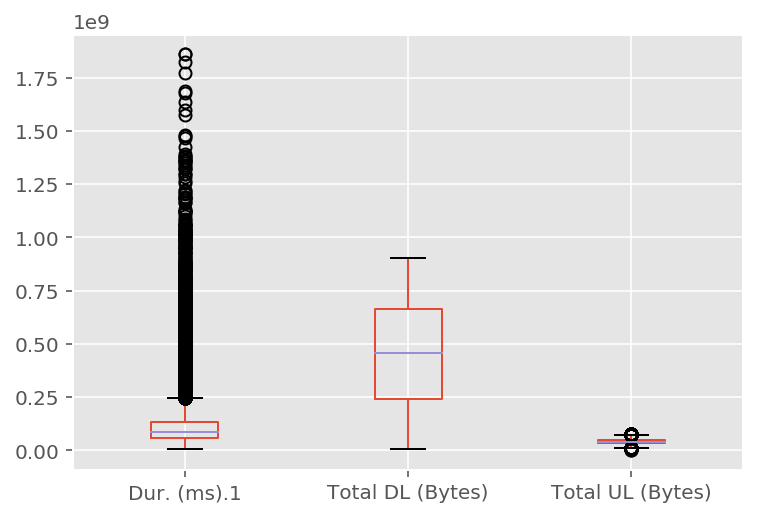

In [155]:
data.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])

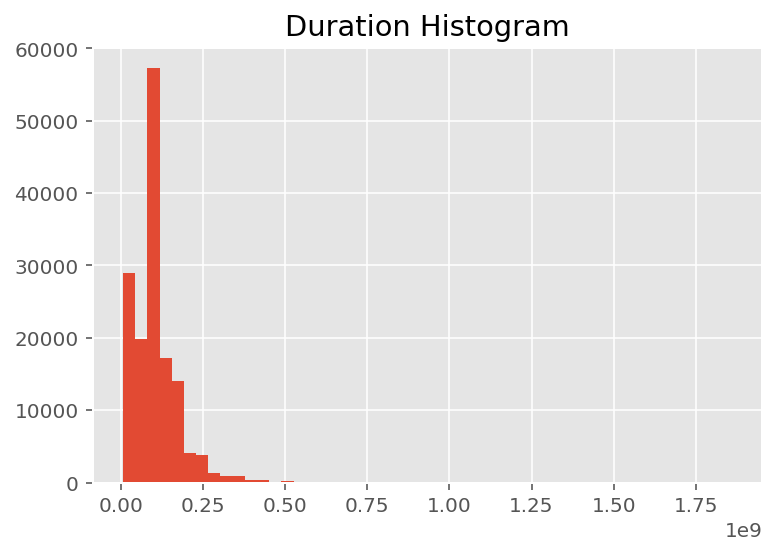

In [60]:
data["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")


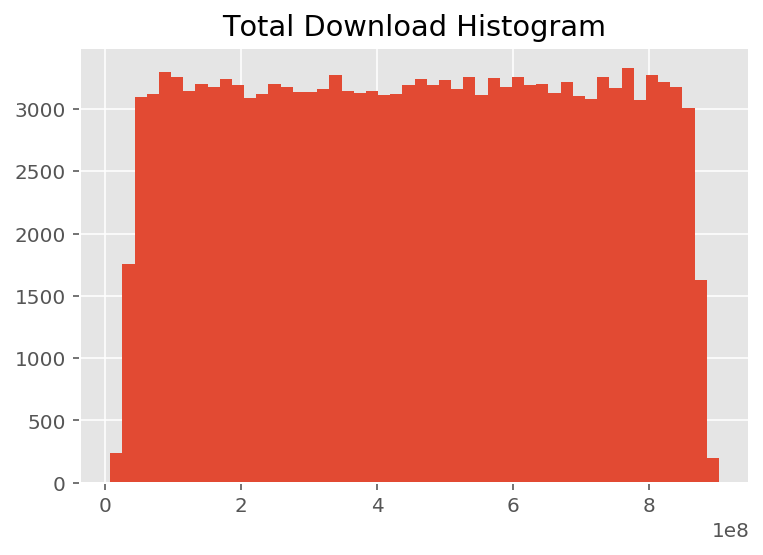

In [61]:
data["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")


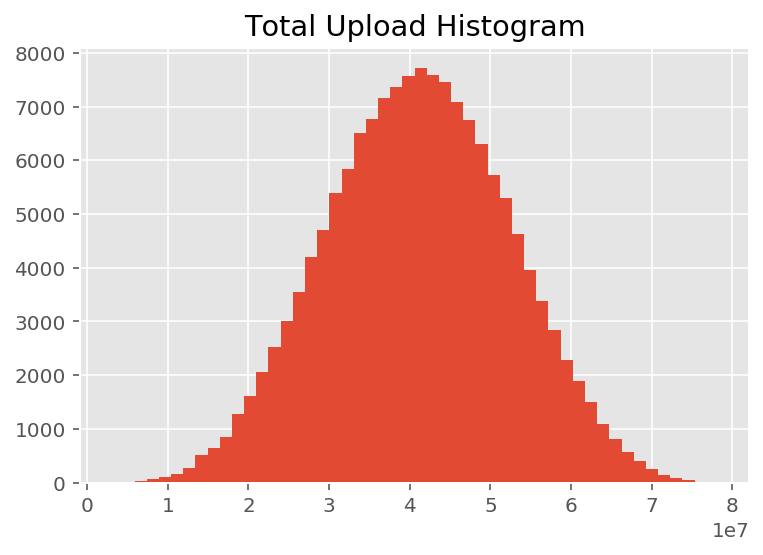

In [62]:
data["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")


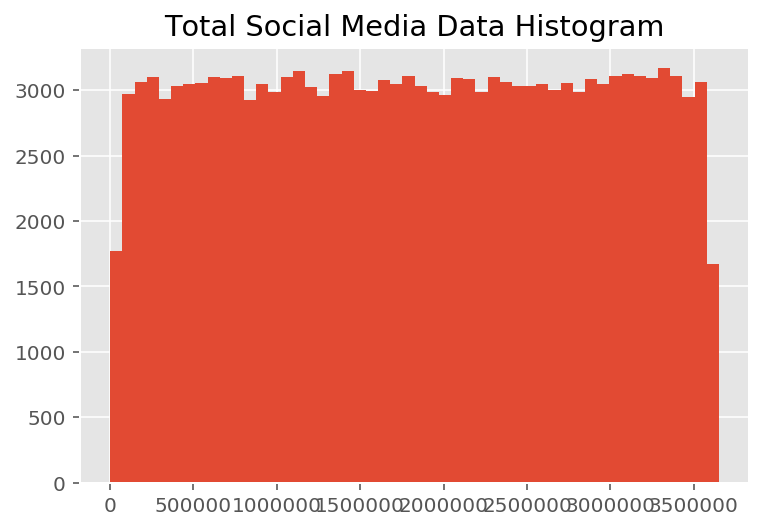

In [63]:
data["Total Social Media"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")


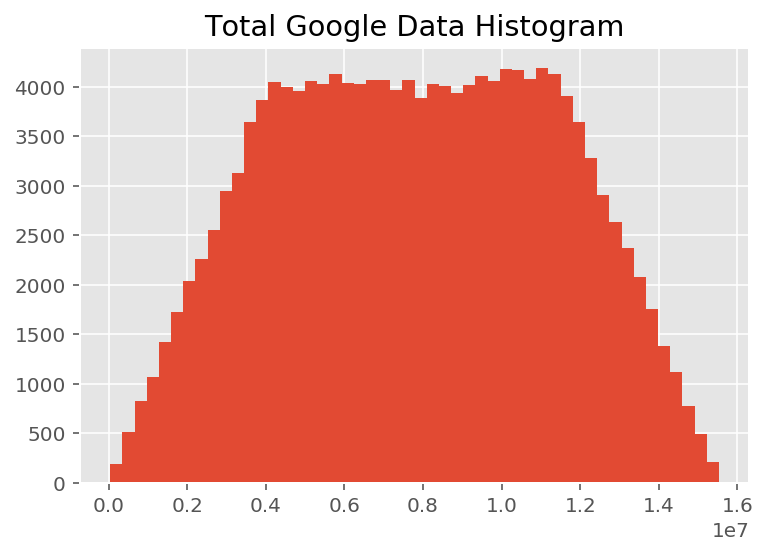

In [64]:
data["Total Google"].hist(bins = 50)
plt.title("Total Google Data Histogram")


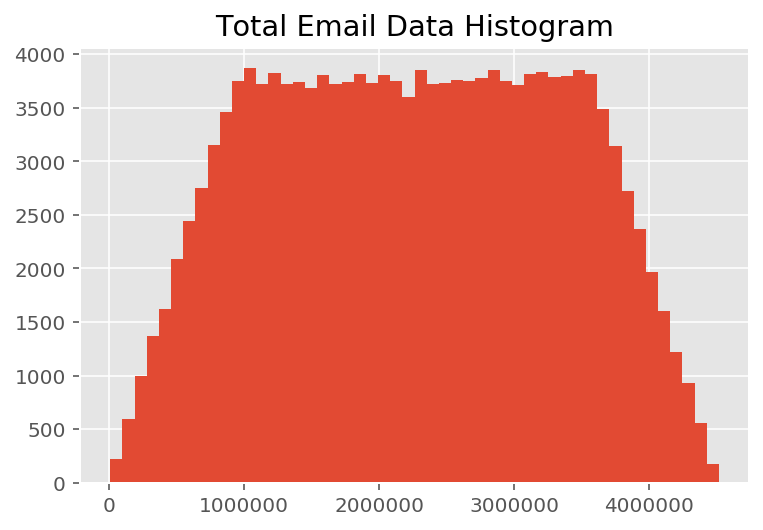

In [65]:
data["Total Email"].hist(bins = 50)
plt.title("Total Email Data Histogram")


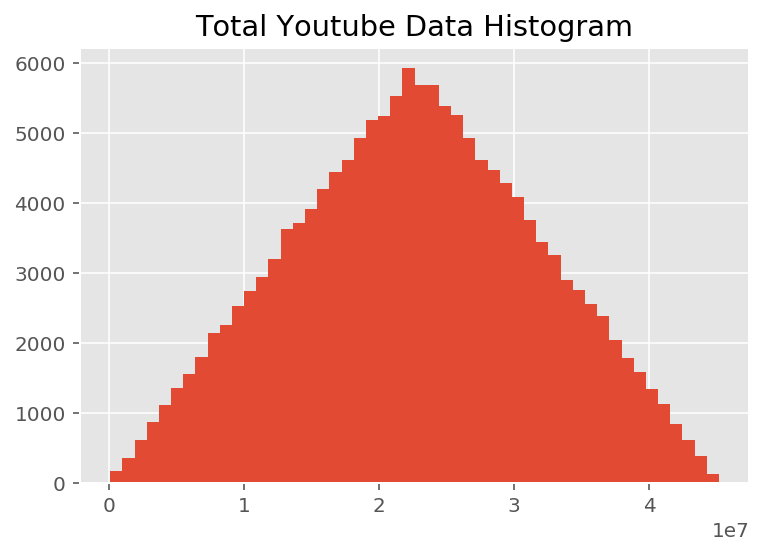

In [66]:
data["Total Youtube"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")


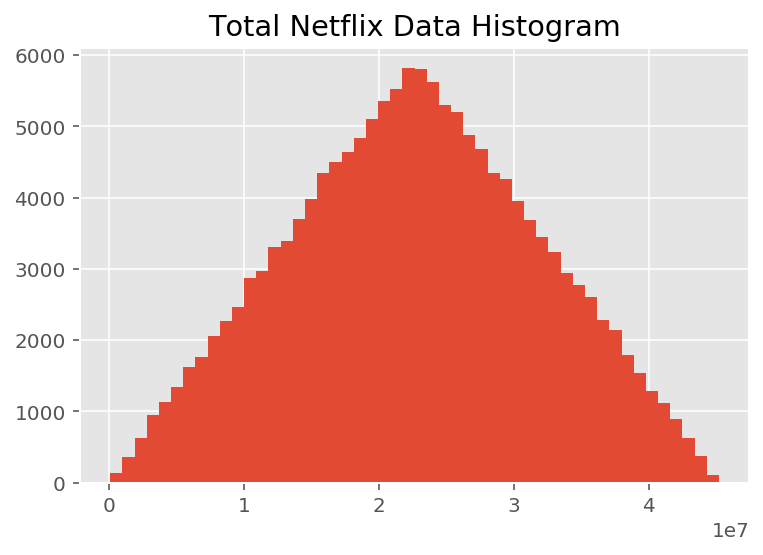

In [67]:
data["Total Netflix"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")


Text(0.5, 1.0, 'Total Gaming Data Histogram')

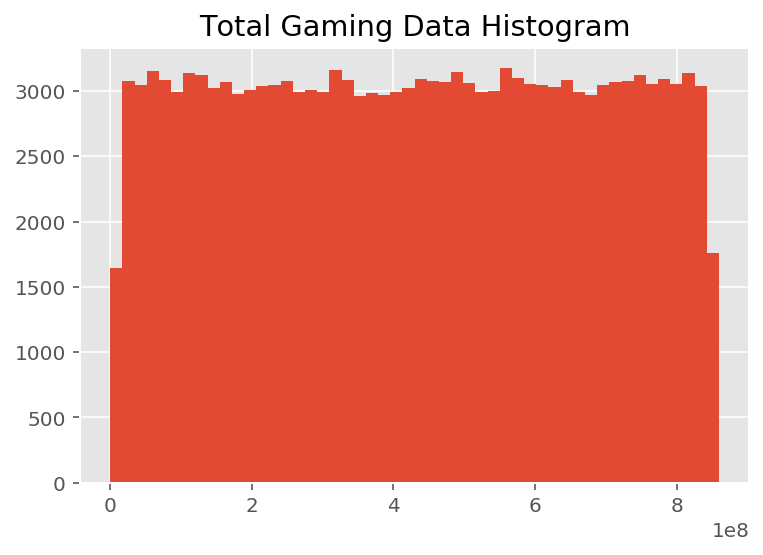

In [69]:
data["Total Gaming"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")


Text(0.5, 1.0, 'App Data usage')

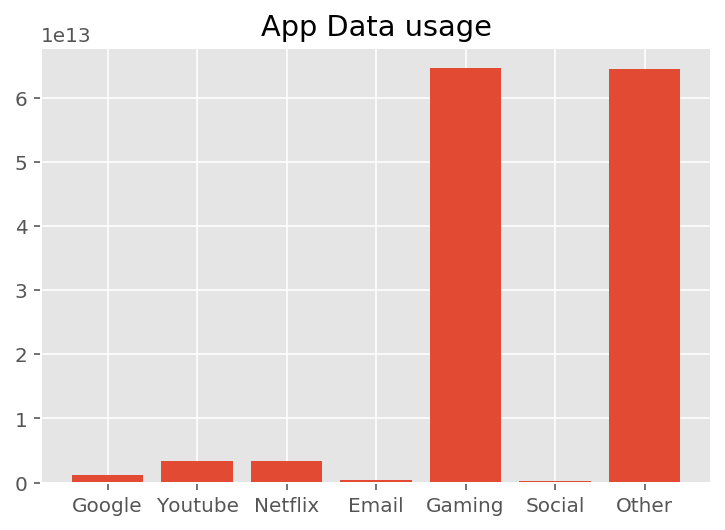

In [131]:
total_usage = app_data[["Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")
